<ipython-input-12-affcdf2baddc>:58: RuntimeWarning: divide by zero encountered in log10
  ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel


timebins:  89986
freqbins:  513


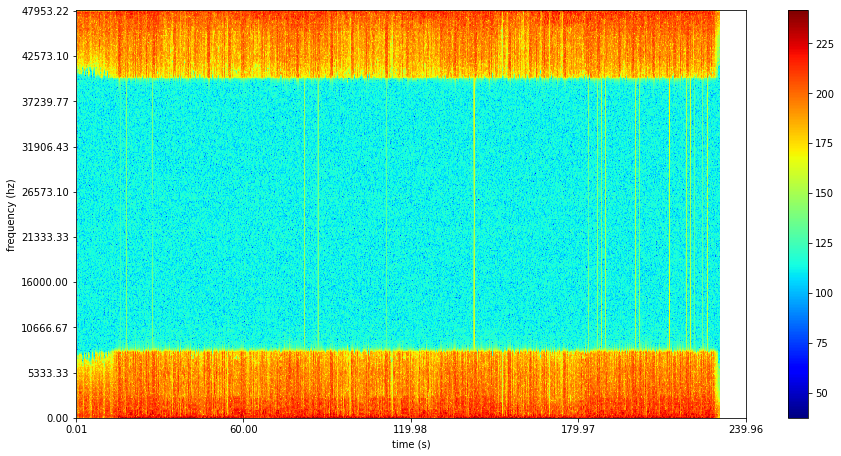

<Figure size 432x288 with 0 Axes>

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks

""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)   
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape=(int(cols), frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    

""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr=44100, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))

    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):        
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,int(scale[i]):], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,int(scale[i]):int(scale[i+1])], axis=1)

    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[int(scale[i]):])]
        else:
            freqs += [np.mean(allfreqs[int(scale[i]):int(scale[i+1])])]

    return newspec, freqs

""" plot spectrogram"""
def plotstft(audiopath, binsize=2**10, plotpath=None, colormap="jet"):
    samplerate, samples = wav.read(audiopath)

    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)

    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel

    timebins, freqbins = np.shape(ims)

    print("timebins: ", timebins)
    print("freqbins: ", freqbins)

    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
    else:
        plt.show()

    plt.clf()

    return ims

ims = plotstft('Inna Ft Daddy Yankee More than Friends (Letra) (online-audio-converter.com).wav')

In [1]:
import os
import matplotlib.pyplot as plt
import random

In [2]:
import librosa
import librosa.display

In [3]:
import IPython.display as ipd
from IPython.display  import Audio

# PROG

In [4]:
ruta_prog = 'D:\Desarrollo\TEyMD_Mineria\Proyecto\prog'
pistas_p = os.listdir(ruta_prog)
ruta_prog
print('pistas de prog: ', len(pistas_p))

pistas de prog:  130


In [5]:
ruta_prog

'D:\\Desarrollo\\TEyMD_Mineria\\Proyecto\\prog'

In [6]:
pistas_p

['01 - The Mountain_02m_00s__03m_00s.mp3',
 '01 A Nightmare To Remember_02m_00s__03m_00s.mp3',
 '01 Acid Rain_02m_00s__03m_00s.mp3',
 '01 Balrog Boogie_02m_00s__03m_00s.mp3',
 "01 C'est la Vie_02m_00s__03m_00s.mp3",
 '01 Clarity_02m_00s__03m_00s.mp3',
 '01 Elephant Talk_02m_00s__03m_00s.mp3',
 '01 Elephant Talk_03m_00s__04m_00s.mp3',
 '01 Jigsaw Hustle_02m_00s__03m_00s.mp3',
 '01 Metropolis, Pt. 1 The Miracle and_02m_00s__03m_00s.mp3',
 '01 Neal And Jack And Me_02m_00s__03m_00s.mp3',
 '01 Red_02m_00s__03m_00s.mp3',
 '01 Stinkfist_02m_00s__03m_00s.mp3',
 '01 The Glass Prision_02m_00s__03m_00s.mp3',
 '01 The Glass Prision_03m_00s__04m_00s.mp3',
 '01 The Grudge_02m_00s__03m_00s.mp3',
 '01 The Grudge_03m_00s__04m_00s.mp3',
 '01 Vicarious_02m_00s__03m_00s.mp3',
 '01 Vicarious_03m_00s__04m_00s.mp3',
 '01 Voodoo Mon Amour_02m_00s__03m_00s.mp3',
 '02 A Rite Of Passage_02m_00s__03m_00s.mp3',
 '02 Dogs_02m_00s__03m_00s.mp3',
 '02 Dogs_03m_00s__04m_00s.mp3',
 '02 Drumhead Trial_02m_00s__03m_00s.m

In [55]:
a = random.randint(0, 129)
samples , sampling_rate = librosa.load(ruta_prog + '\\' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
len(samples), sampling_rate, a

(2649600, 44100, 13)

In [56]:
samples

array([ 0.        ,  0.        ,  0.        , ..., -0.08895874,
       -0.2258606 , -0.33721924], dtype=float32)

In [57]:
samples.shape

(2649600,)

In [58]:
pistas_p[a]

'01 The Glass Prision_02m_00s__03m_00s.mp3'

In [59]:
Audio(ruta_prog + '\\' + pistas_p[a])

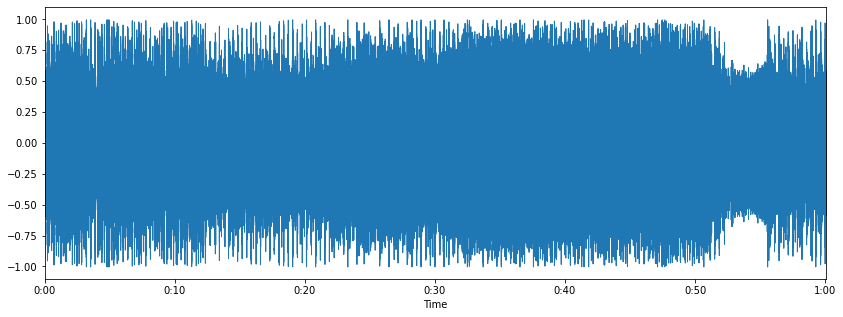

In [60]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sampling_rate)

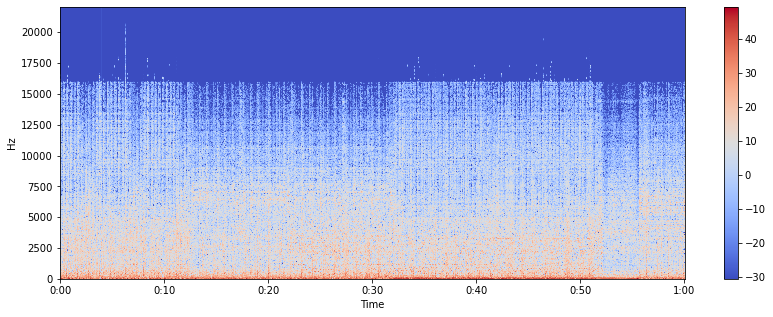

In [61]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

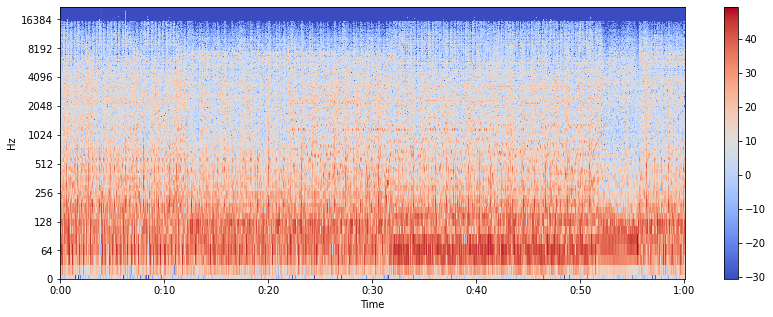

In [62]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

# SALSA

In [39]:
ruta_salsa = 'D:\Desarrollo\TEyMD_Mineria\Proyecto\salsa'
pistas_s = os.listdir(ruta_salsa)
print('Pistas de salsa: ', len(pistas_s))

Pistas de salsa:  130


In [40]:
pistas_s

['004LA CITA-GALI GALEANO_01m_00s__02m_00s.mp3',
 '004SI SUPIERA-WILLIE GONZALEZ_01m_00s__02m_00s.mp3',
 '005DE PUNTA A PUNTA-CANEO_01m_00s__02m_00s.mp3',
 '006DESDE EL FONDO DE MI CORAZON - HILDEMARO_01m_00s__02m_00s.mp3',
 '006LO QUIERO A MORIR-ZAYDA_01m_00s__02m_00s.mp3',
 '006MI MEDIA MITAD-REY RUIZ_01m_00s__02m_00s.mp3',
 '007AMOR DESECHABLE-LATIN BROTHERS_01m_00s__02m_00s.mp3',
 '007PROCURA-CHICHI PERALTA_01m_00s__02m_00s.mp3',
 '008ASI FUE-NELSON DIAZ Y LA CONSTELACION_01m_00s__02m_00s.mp3',
 '008REYES DEL AMOR-BANDA DEL FUTURO_01m_00s__02m_00s.mp3',
 '009LA PENA QUE YO SIENTO-TANIA_01m_00s__02m_00s.mp3',
 '009SEDA-WILLIE GONZALEZ_01m_00s__02m_00s.mp3',
 '009TU CON EL-FRANKIE RUIZ_01m_00s__02m_00s.mp3',
 '010VESTIDA DE BLANCO-GERMAN CARREÑO_01m_00s__02m_00s.mp3',
 '011CASI TE ENVIDIO-ANDY MONTAÑEZ_01m_00s__02m_00s.mp3',
 '011LLUVIA-EDDIE SANTIAGO_01m_00s__02m_00s.mp3',
 '011PEQUEÑAS COSAS-WILLIE GONZALEZ_01m_00s__02m_00s.mp3',
 '012CONCIENCIA-GILBERTO SANTA ROSA_01m_00s__02m_00s

In [71]:
a = random.randint(0, 129)
samples , sampling_rate = librosa.load(ruta_salsa + '\\' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
len(samples), sampling_rate, a

(2640384, 44100, 81)

In [72]:
samples

array([ 0.        ,  0.        ,  0.        , ...,  0.01811218,
        0.01071167, -0.00273132], dtype=float32)

In [73]:
pistas_s[a]

'CORAZON ANDINO-LOS SHAPIS_01m_00s__02m_00s.mp3'

In [74]:
Audio(ruta_salsa + '\\' + pistas_s[a])

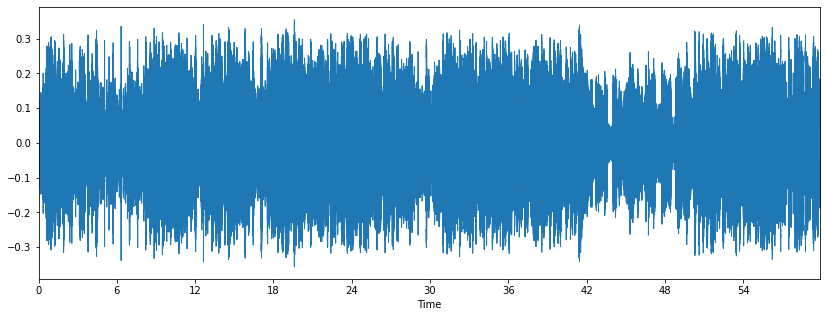

In [75]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sampling_rate)

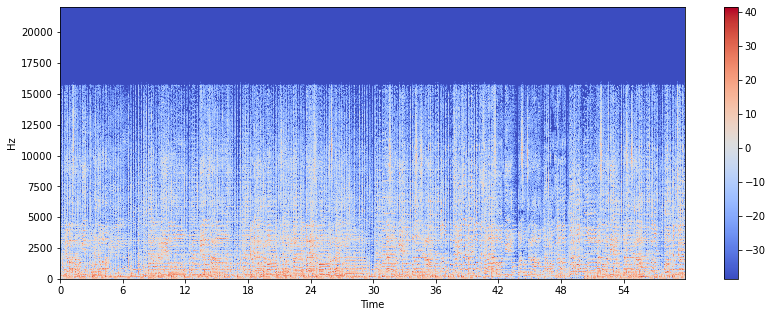

In [76]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

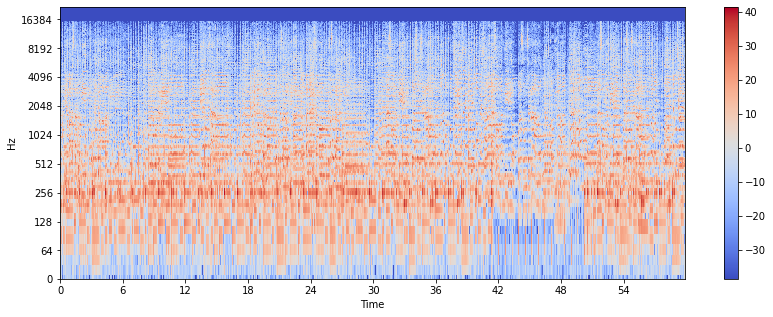

In [77]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [78]:
Audio(ruta_salsa + '\\' + pistas_s[a])

# Electro

In [23]:
ruta_electro = 'D:\Desarrollo\TEyMD_Mineria\Proyecto\electronica'
pistas_e = os.listdir(ruta_electro)
pistas_e

['#Selfie_01m_00s__02m_00s.mp3',
 '(RAGE MIX) DJ BL3ND_01m_00s__02m_00s.mp3',
 '(RAGE MIX) DJ BL3ND_03m_00s__04m_00s.mp3',
 '(ROCKIN MIX) DJ BL3ND_01m_00s__02m_00s.mp3',
 '(ROCKIN MIX) DJ BL3ND_02m_00s__03m_00s.mp3',
 '(SUMMER MIX) DJ BL3ND[7]_01m_00s__02m_00s.mp3',
 '(SUMMER MIX) DJ BL3ND[7]_04m_00s__05m_00s.mp3',
 '01 Faded_01m_00s__02m_00s.mp3',
 '01 Good Evening Chicago_01m_00s__02m_00s.mp3',
 '01 Hot Diana_01m_00s__02m_00s.mp3',
 '01 Lean On_01m_00s__02m_00s.mp3',
 '01 Maximal Crazy (Original Mix)_01m_00s__02m_00s.mp3',
 '01 No Money_01m_00s__02m_00s.mp3',
 '01 Ode To Oi (Original Mix)_01m_00s__02m_00s.mp3',
 '01 Purple Lamborghini_01m_00s__02m_00s.mp3',
 '01 WILD MIX_01m_00s__02m_00s.mp3',
 '01 Yeah (Original Mix)_01m_00s__02m_00s.mp3',
 '02 Good Evening Chicago (Klaus Hill_01m_00s__02m_00s.mp3',
 '02 Without Love_01m_00s__02m_00s.mp3',
 '03 Ass Hypnotized_01m_00s__02m_00s.mp3',
 '03 Haters_00m_00s__01m_00s.mp3',
 '03 Haters_01m_00s__02m_00s.mp3',
 '03 I Dont Know Where_01m_00s__

In [86]:
a = random.randint(0, 129)
samples , sampling_rate = librosa.load(ruta_electro + '\\' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)
len(samples), sampling_rate, a

(2644992, 44100, 26)

In [87]:
samples

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [88]:
pistas_e[a]

'04 Runaway (Boothed Bootleg)_04m_00s__05m_00s.mp3'

In [89]:
Audio(ruta_electro + '\\' + pistas_e[a])

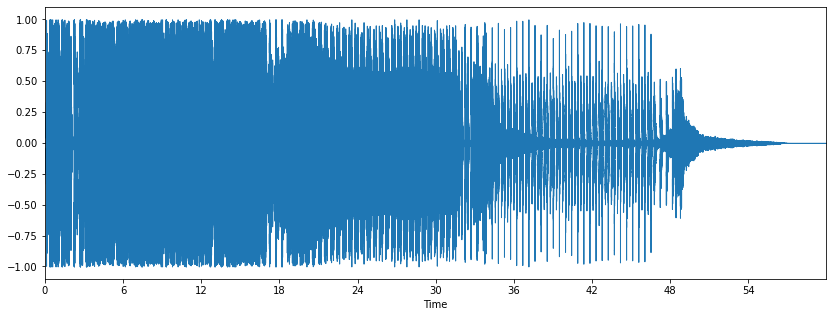

In [90]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sampling_rate)

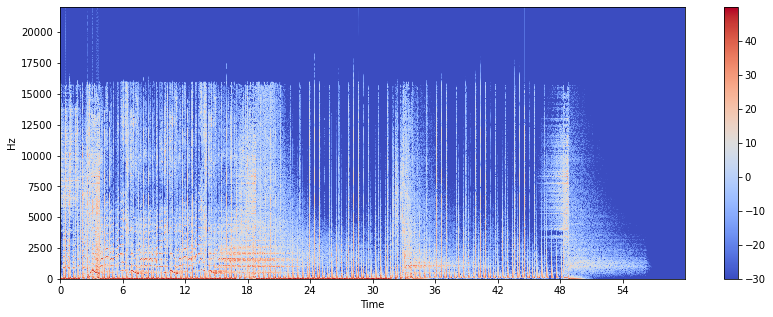

In [91]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

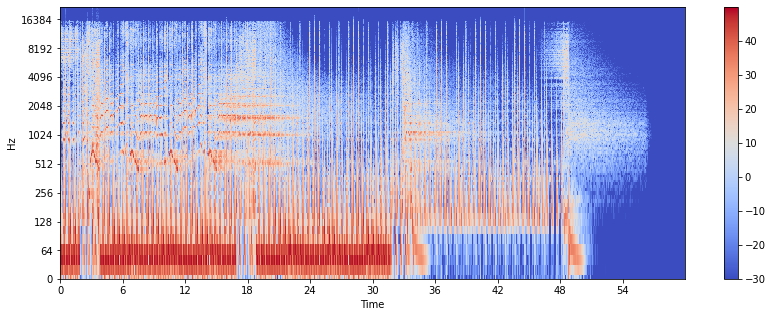

In [92]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [93]:
Audio(ruta_electro + '\\' + pistas_e[a])

In [94]:
samples.shape

(2644992,)

In [141]:
samples

array([ 0.        ,  0.        ,  0.        , ..., -0.01864624,
        0.12800598,  0.50431824], dtype=float32)

In [142]:
sampling_rate

44100

In [95]:
type(samples)

numpy.ndarray

In [153]:
M_prog = []
m_prog = []
for i in range(130):
    s , sr = librosa.load(ruta_prog + '\\' + pistas_p[i], sr = None, mono = True, offset = 0.0, duration = None)
    M_prog.append(librosa.stft(s))